Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

# Load Dataset
Memuat dataset dari file csv

In [2]:
df = pd.read_csv("../kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Preprocessing


## Analisis data
Pada tahap Preprocessing ini perlu dilakukan analisis pada dataset terkait masalah apa saja yang ada pada dataset sehingga bisa dilakukan pembersihan/penyesuaian dataset.

In [3]:
# Menghapus kolom id
df.drop('id', axis = 1, inplace = True)

## Masalah

Dari analisis data maka didapati beberapa masalah pada dataset


Identifikasi:
1. Nama kolom tidak friendly
2. Terdapat kolom yang terlihat bertipe numerik, namun sebenarnya kategorikal
3. Terdapat Missing value pada beberapa kolom
4. Terdapat kesalahan penulisan pada beberapa kolom
5. Beberapa kolom bertipe kategorikal, perlu diubah ke numerik
6. Terdapat data outlier - Skenario Uji (Hapus Outlier)


## Penanganan 
Dari masalah-masalah yang telah didapati maka akan dilakukan penanganan yang sesuai sbb:
1. Rename nama kolom
2. Konversi Tipe Data
3. Penanganan Missing Value

    a. Tipe data numerik by Mean Imputation

    b. Tipe data kategorikal by Mode Imputation
4. Penyelarasan/penyesuaian nilai by replace
5. Dilakukan Transformasi tipe data kategorikal ke numerik by oneHotEncoder
6. Hapus outlier

### Rename lebel/nama Kolom

In [4]:
# Rename label menggunakan nama yang mudah dimengerti
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Konversi Tipe Data

In [5]:
# Mengecek Tipe data dari kolom
kolom_kategorikal = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

for i in kolom_kategorikal:
    print(f"{i} -: {df[i].dtype}")

packed_cell_volume -: object
white_blood_cell_count -: object
red_blood_cell_count -: object


In [6]:
def convert_text_to_numeric_col (dataframe, feature):
    dataframe[feature] = pd.to_numeric(df[feature], errors='coerce')

for column in kolom_kategorikal:
    convert_text_to_numeric_col(df, column)
    print(f"text_columns: {df[column].dtype}")

df.head()

text_columns: float64
text_columns: float64
text_columns: float64


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### Penanganan Missing Value

In [7]:
# mengatasi missing value menggunakan nilai rata2
def mean_impute(dataframe, feature):
    mean_impute=dataframe[feature].mean()
    dataframe[feature].fillna(value=mean_impute, inplace=True)

# mengganti missing value dengan data frekuensi tertinggi
def mode_impute(dataframe, feature):
    mode = dataframe[feature].mode()[0]
    dataframe[feature] = dataframe[feature].fillna(mode)  

# Mencari kolom yang bertipe numerik
kolom_numerik = [col for col in df.columns if df[col].dtype != 'object']
# memasukkan nomor random rata-rata sebagai pengganti missing value pada kolom data numerik
for kolom in kolom_numerik:
    mean_impute(df,kolom)

# Mencari kolom yang bertipe kategorikal
data_cat = [col for col in df.columns if df[col].dtype == 'object']
mode_impute(df,"blood_pressure")
# memasukkan frekuensi tertinggi sebagai missing value pada kolom data kategorikal
for kolom in data_cat:
    mode_impute(df,kolom)

### Penyesuaian Nilai

In [8]:
# Mengatasi TYPO value pada kolom
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {' yes':'yes', '\tno':'no', '\tyes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

print(f"diabetes_mellitus'] :- {df['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :- {df['coronary_artery_disease'].unique()}")
print(f"class :- {df['class'].unique()}")

diabetes_mellitus'] :- ['yes' 'no']
coronary_artery_disease :- ['no' 'yes']
class :- ['ckd' 'not ckd']


### Transformasi Data

In [9]:
# Copy DataFrame agar tidak merubah DataFrame asli
# df_encoded = df.copy()

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse=False)

# Kolom yang akan diencode
data_cat = [col for col in df.columns if df[col].dtype == 'object']

# One-hot encoding
df_encoded = pd.DataFrame(encoder.fit_transform(df[data_cat]), columns=encoder.get_feature_names_out(data_cat))

# Konkatenasi df yang diencode dengan kolom 'class' yang tidak diencode
df_encoded = pd.concat([df['class'], df_encoded], axis=1)

# Perbarui df asli dengan kolom yang diencode
df = pd.concat([df.drop(columns=data_cat), df_encoded.drop(columns='class')], axis=1)




c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Skenario Hapus Outlier


### MRMR

### Normalisasi

# Modeling

In [10]:
X = df.drop("class_not ckd", axis=1)
y = df['class_not ckd']

# Menentukan data train 80% dan data test 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memastikan bahwa data train 80% dan data test 20%
print(f"'X' shape:{X_train.shape}")
print(f"'y' shape:{X_test.shape}")

'X' shape:(320, 24)
'y' shape:(80, 24)


### Training Model

In [11]:
pohon = 100 #jumlah pohon
subset = "sqrt" #pemilihan subset acak
sample = 0.8 #jumlah sample bootstrap yang digunakan untuk modeling forest
kedalaman = 2 #kedalaman max pohon 

clf_rand_forest = RandomForestClassifier(n_estimators=pohon, max_depth=kedalaman, min_samples_split=2, criterion='entropy', bootstrap=True, max_features=subset, max_samples= sample)
clf_rand_forest.fit(X_train, Y_train)
rf = clf_rand_forest.score(X_test,Y_test)
rf

0.9875

### Predict Model

In [12]:
Y_pred = clf_rand_forest.predict(X_test)
rand_forest_acc = accuracy_score(Y_test, Y_pred)
print(rand_forest_acc)

0.9875


# Evaluasi Model

Evaluasi model dilakukan guna mengukur kinerja model Random Forest

### Confusion Matrix

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        52
         1.0       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



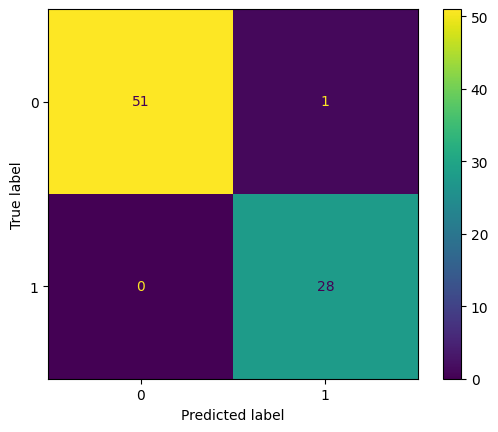

In [13]:
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()